In [1]:
from google.colab import files
files=files.upload()

Saving Mall_Customers.csv to Mall_Customers.csv


In [2]:
import sys

import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from pandas.plotting import parallel_coordinates, andrews_curves, radviz, scatter_matrix
import seaborn as sns

import sklearn
from sklearn import datasets
from scipy import stats

from IPython.display import set_matplotlib_formats
matplotlib.style.use('ggplot') # Other styles matplotlib.style.available
import os
from warnings import filterwarnings
filterwarnings('ignore')

%matplotlib inline
sns.set_context('notebook')
plt.close('all')

En este problema utilizaremos la librería seaborn

**Seaborn**: It is also a Python library used for plotting graphs with the help of Matplotlib, Pandas, and Numpy.

## Importamos el dataset

In [3]:
path = 'Mall_Customers.csv'
df = pd.read_csv(path)

In [4]:
# Obtener alguna información del dataframe, columnas y primeras filas
print(df.info())
print(df.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Genre                   200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB
None
   CustomerID   Genre  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40


In [5]:
# Obtener la dimensión del dataframe
print(df.shape)

(200, 5)


Cambiamos el nombre de las columnas por comodidad

In [6]:
df.rename(columns={'Annual Income (k$)':'Annual_income','Spending Score (1-100)':'Spending_score'}, inplace=True)

### Análisis exploratiorio de los datos

In [7]:
df.describe()

,CustomerID,Age,Annual_income,Spending_score
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


# Vamos a plotaer características en grupos de 2 para ver si encontramos algunos clústers

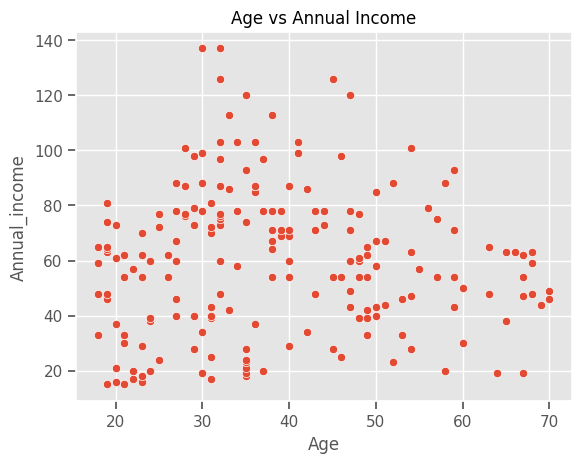

In [8]:
# Tarea: Plotear la gráfica para comparar en el eje X la edad vs Ingreso anual
sns.scatterplot(data=df, x='Age', y='Annual_income')
plt.title('Age vs Annual Income')
plt.show()

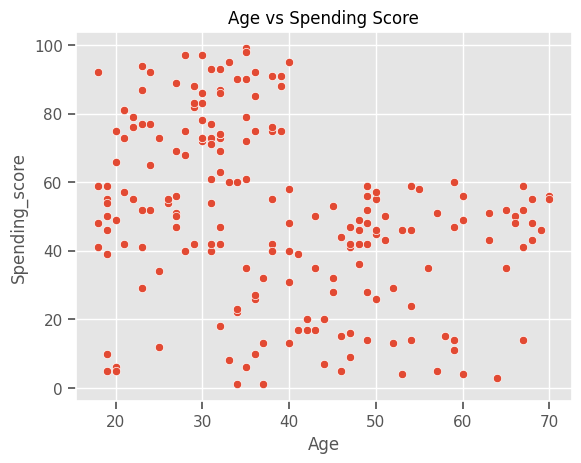

In [9]:
# Tarea: Plotear la gráfica edad vs coeficiente de gasto
sns.scatterplot(data=df, x='Age', y='Spending_score')
plt.title('Age vs Spending Score')
plt.show()

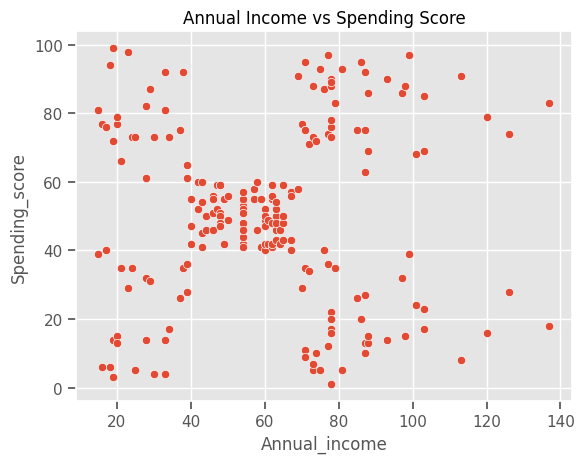

In [10]:
# Tarea: Plotear la gráfica que falta para comparar relación entre características
sns.scatterplot(data=df, x='Annual_income', y='Spending_score')
plt.title('Annual Income vs Spending Score')
plt.show()

# ¿Es cómodo seaborn?

# ¿Qué plot os gusta más para trabajar?

¿Cuántos clusters veis?

### Si hubiese que entrenar con dos características... ¿Cuales os gustan más?

In [11]:
# Tarea: generar la matriz de entrenamiento con ...
X = df[['Annual_income', 'Spending_score']].values
print(X.shape)


# Debe qudar una matrix de (200, 2)

(200, 2)


### Entrenamieto K-Means

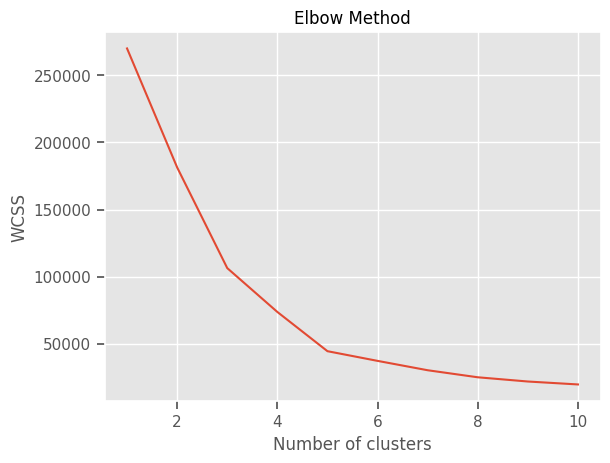

In [12]:
# Tarea: Entrenar k-means con elbow-method
from sklearn.cluster import KMeans

wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

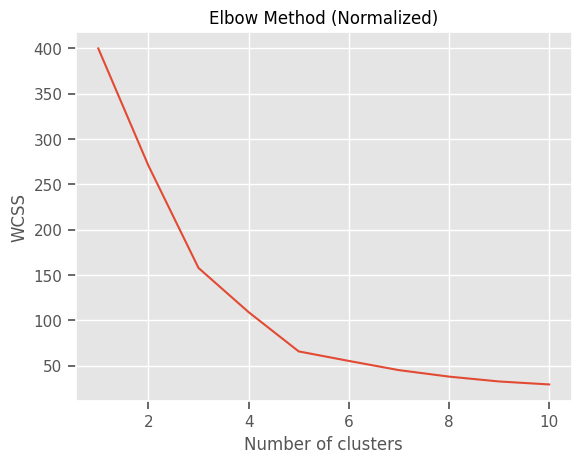

In [13]:
# Tarea: repetir el proceso anterior normalizando las características
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_normalized = scaler.fit_transform(X)

wcss_normalized = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=42)
    kmeans.fit(X_normalized)
    wcss_normalized.append(kmeans.inertia_)

plt.plot(range(1, 11), wcss_normalized)
plt.title('Elbow Method (Normalized)')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

# Seguir sin normalizar

# ¿Cuántos clusters?

For 2 clusters: average silhouette_score is 0.2968969162503008
For 3 clusters: average silhouette_score is 0.46761358158775435
For 4 clusters: average silhouette_score is 0.4931963109249047
For 5 clusters: average silhouette_score is 0.553931997444648
For 6 clusters: average silhouette_score is 0.53976103063432
For 7 clusters: average silhouette_score is 0.5264283703685728
For 8 clusters: average silhouette_score is 0.45827056882053113


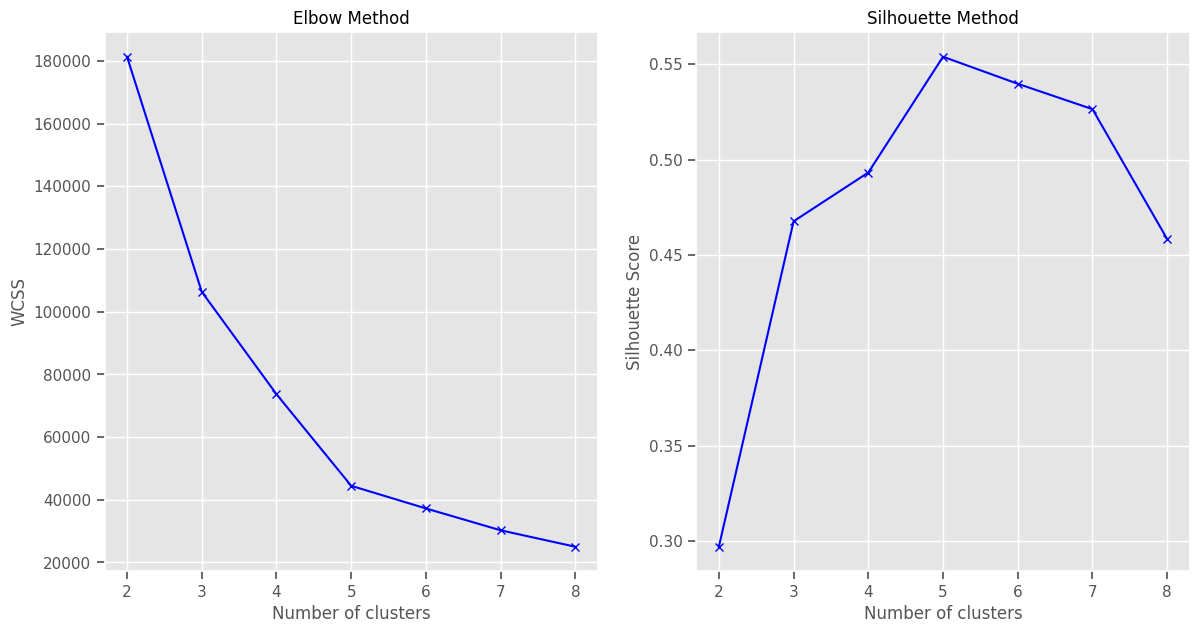

In [16]:
from sklearn.metrics import silhouette_score

#Calculamos silhouette score medio

# Comparativa del elbow-method vs silhoouette method

For 2 clusters: average silhouette_score is 0.2968969162503008
For 3 clusters: average silhouette_score is 0.46761358158775435
For 4 clusters: average silhouette_score is 0.4931963109249047
For 5 clusters: average silhouette_score is 0.553931997444648
For 6 clusters: average silhouette_score is 0.53976103063432
For 7 clusters: average silhouette_score is 0.5264283703685728
For 8 clusters: average silhouette_score is 0.45827056882053113


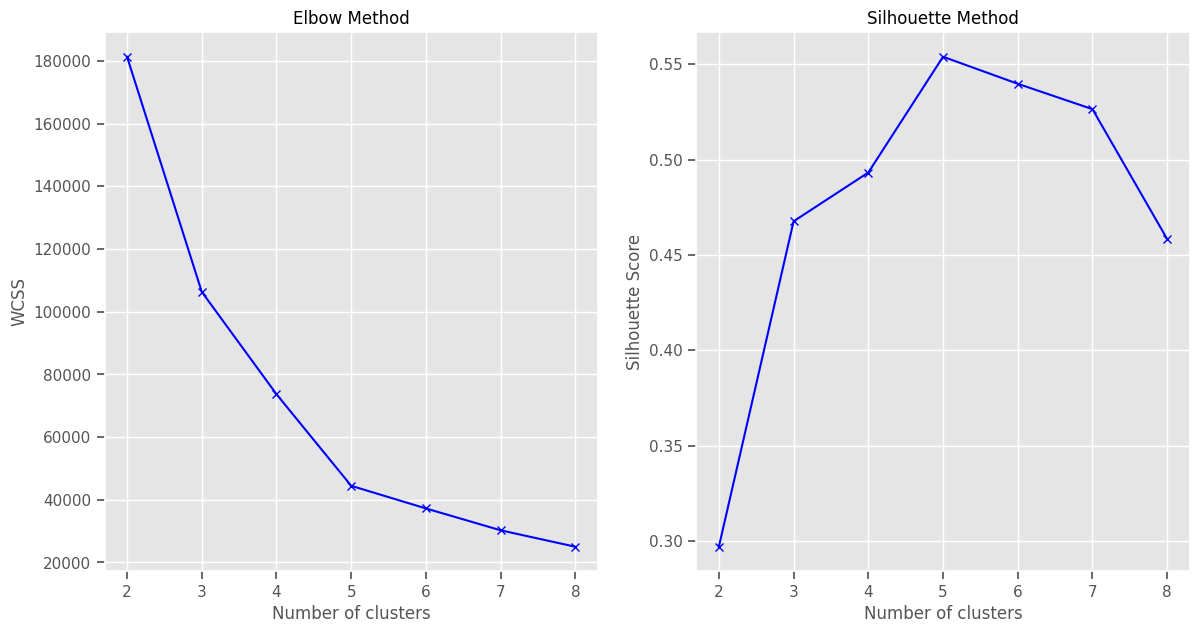

In [18]:
from sklearn.metrics import silhouette_score

range_n_clusters = range(2, 9)
elbow = []
ss = []

for n_clusters in range_n_clusters:
    clusterer = KMeans(n_clusters=n_clusters, init='k-means++', max_iter=300, n_init=10, random_state=42)
    cluster_labels = clusterer.fit_predict(X)
    silhouette_avg = silhouette_score(X, cluster_labels)
    ss.append(silhouette_avg)
    elbow.append(clusterer.inertia_)
    print(f"For {n_clusters} clusters: average silhouette_score is {silhouette_avg}")

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 7))
ax1.plot(range_n_clusters, elbow, 'bx-')
ax1.set_title('Elbow Method')
ax1.set_xlabel('Number of clusters')
ax1.set_ylabel('WCSS')

ax2.plot(range_n_clusters, ss, 'bx-')
ax2.set_title('Silhouette Method')
ax2.set_xlabel('Number of clusters')
ax2.set_ylabel('Silhouette Score')

plt.show()

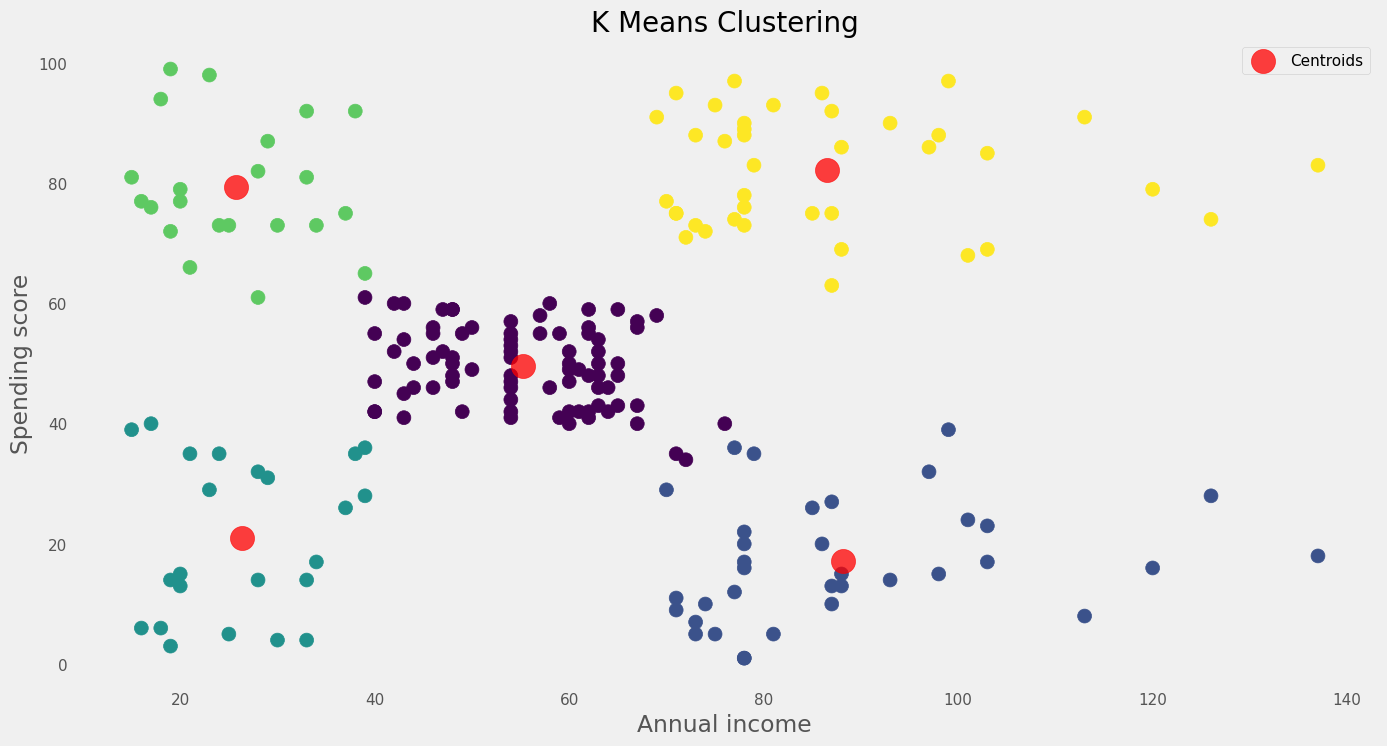

In [20]:
from sklearn.cluster import KMeans

# Ahora, utilicemos el método fit_predict() para obtener la pertenencia de cluster de cada muestra
kmeans = KMeans(n_clusters=5, init='k-means++', max_iter=300, n_init=10, random_state=42)
pred_y = kmeans.fit_predict(X)

plt.rcParams['figure.figsize'] = (15, 8)
plt.style.use('fivethirtyeight')

# Plotear acorde con la predicción, utilizando matplotlib
plt.scatter(X[:, 0], X[:, 1], c=pred_y, s=100, cmap='viridis')
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=300, alpha=0.75, label='Centroids')
plt.title('K Means Clustering', fontsize=20)
plt.xlabel('Annual income')
plt.ylabel('Spending score')
plt.legend()
plt.grid()
plt.show()

Veamos cómo de consolidados está cada uno de los clusters.

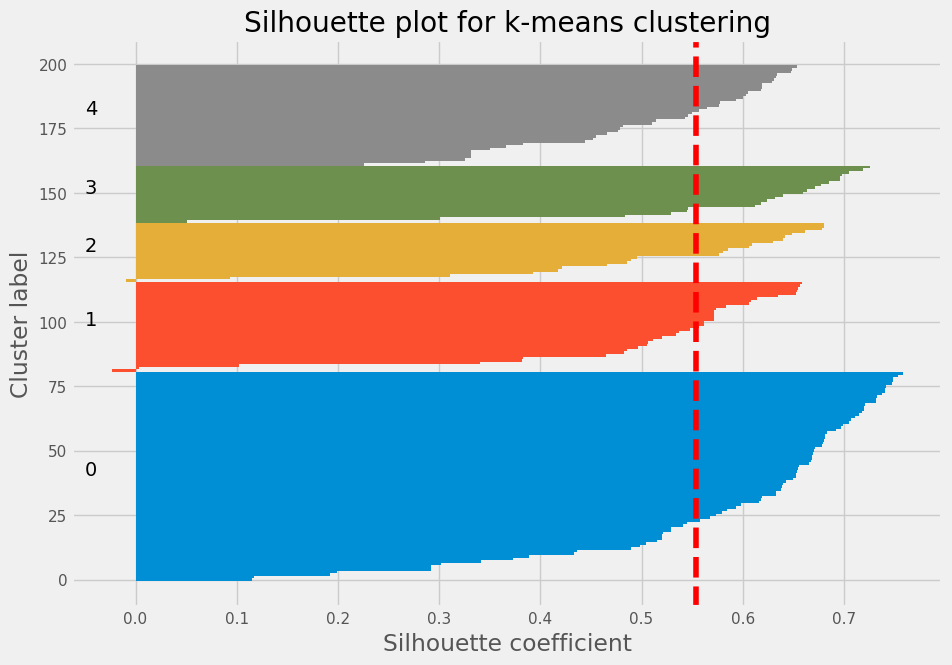

In [21]:
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.cm as cm

# Calcular los valores de silhouette para cada muestra y el avg
silhouette_vals = silhouette_samples(X, pred_y)
silhouette_avg = silhouette_score(X, pred_y)

# Plot silhouette plot
y_lower, y_upper = 0, 0

# Realizamos el plot de los Silhouette
fig, ax = plt.subplots(figsize=(10, 7))
for i in range(kmeans.n_clusters):
    # Obtenemos los valores silhouette del cluster i
    cluster_silhouette_vals = silhouette_vals[pred_y == i]
    cluster_silhouette_vals.sort()
    y_upper += len(cluster_silhouette_vals)
    ax.barh(range(y_lower, y_upper), cluster_silhouette_vals, height=1)
    ax.text(-0.05, (y_lower + y_upper) / 2, str(i))
    y_lower += len(cluster_silhouette_vals)

# Plotear el silhouette average como una línea vertical
ax.axvline(x=silhouette_avg, color="red", linestyle="--")
plt.xlabel("Silhouette coefficient")
plt.ylabel("Cluster label")
plt.title("Silhouette plot for k-means clustering")
plt.show()

### ¿Qué clusters aportan más confianza? ¿Qué cluster es el más grande?

In [22]:
# Una práctica muy habitual es añadir la información obtenida, como por ejemplo,
# el clúster al dataframe original. Esto nos puede facilitar trabajo futuro o incluso
# guardar un nuevo fichero

# Añadir la predicción del cluster al dataframe, la columna se debe llamar Cluster
df['Cluster'] = pred_y


In [23]:
# Mostrar cuantas muestras hay en cada clase en orden descendente. Mirar el método value_counts()
print(df['Cluster'].value_counts())

Cluster
0    81
4    39
1    35
2    23
3    22
Name: count, dtype: int64


Veamos la distribución de los IDs.

In [24]:
for i in range(0,5):
  print('Customer IDs for cluster:', i)
  print(df[df['Cluster'] == i]['CustomerID'].values)
  print()

Customer IDs for cluster: 0
[ 44  47  48  49  50  51  52  53  54  55  56  57  58  59  60  61  62  63
  64  65  66  67  68  69  70  71  72  73  74  75  76  77  78  79  80  81
  82  83  84  85  86  87  88  89  90  91  92  93  94  95  96  97  98  99
 100 101 102 103 104 105 106 107 108 109 110 111 112 113 114 115 116 117
 118 119 120 121 122 123 127 133 143]

Customer IDs for cluster: 1
[125 129 131 135 137 139 141 145 147 149 151 153 155 157 159 161 163 165
 167 169 171 173 175 177 179 181 183 185 187 189 191 193 195 197 199]

Customer IDs for cluster: 2
[ 1  3  5  7  9 11 13 15 17 19 21 23 25 27 29 31 33 35 37 39 41 43 45]

Customer IDs for cluster: 3
[ 2  4  6  8 10 12 14 16 18 20 22 24 26 28 30 32 34 36 38 40 42 46]

Customer IDs for cluster: 4
[124 126 128 130 132 134 136 138 140 142 144 146 148 150 152 154 156 158
 160 162 164 166 168 170 172 174 176 178 180 182 184 186 188 190 192 194
 196 198 200]



### Visualizamos los Clusters

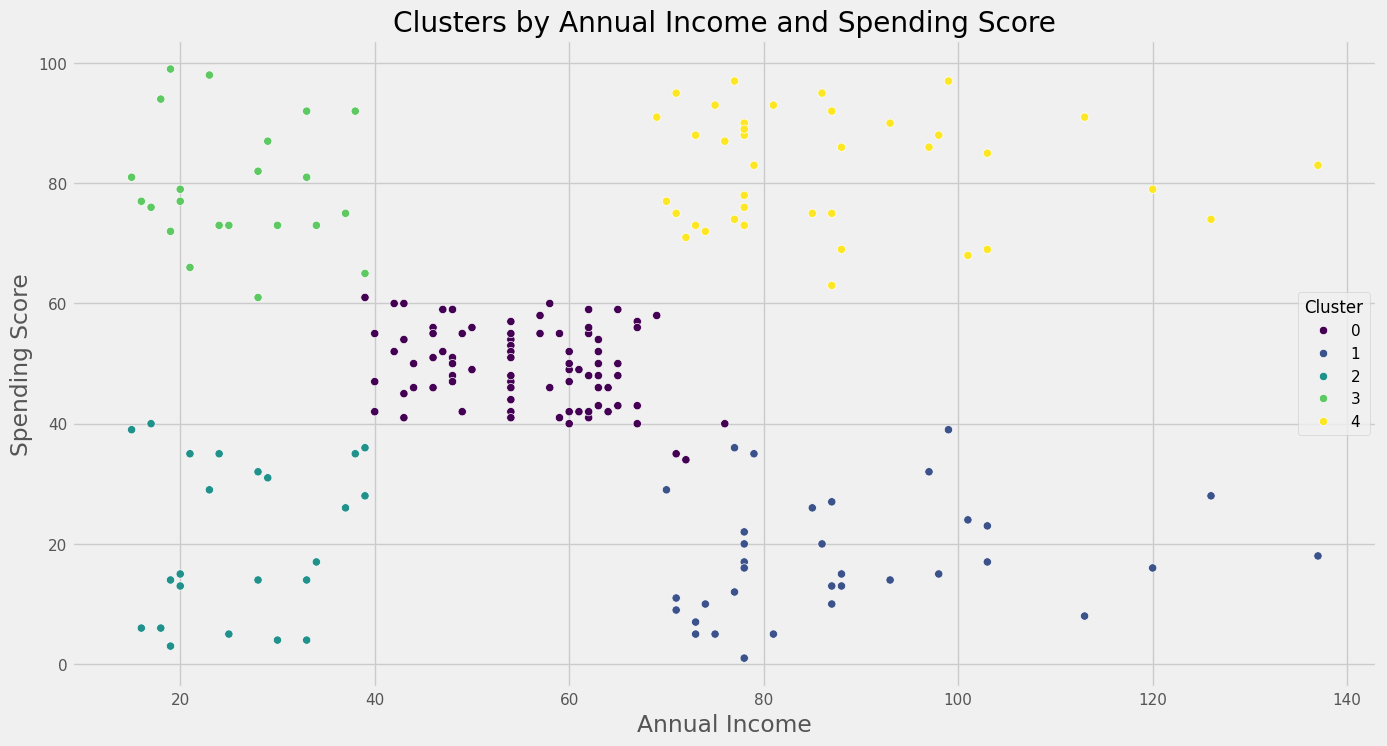

In [25]:
# Tarea: Visualizar los clusters, ahora sí, con seaborn ya que tenemos un dataframe.
# Los ejes deben representar las características utilizadas en el entrenamiento
sns.scatterplot(data=df, x='Annual_income', y='Spending_score', hue='Cluster', palette='viridis')
plt.title('Clusters by Annual Income and Spending Score')
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.legend(title='Cluster')
plt.show()

# Vamos a añadir la edad a ver si mejora el clustering

In [26]:
# Volvemos a leer por higiene

df2 = pd.read_csv(path)
df2.rename(columns={'Annual Income (k$)':'Annual_income','Spending Score (1-100)':'Spending_score'}, inplace=True)

In [27]:
# Creamos la matriz ahora con las 3 características
X2 = df2[['Annual_income', 'Spending_score', 'Age']].values

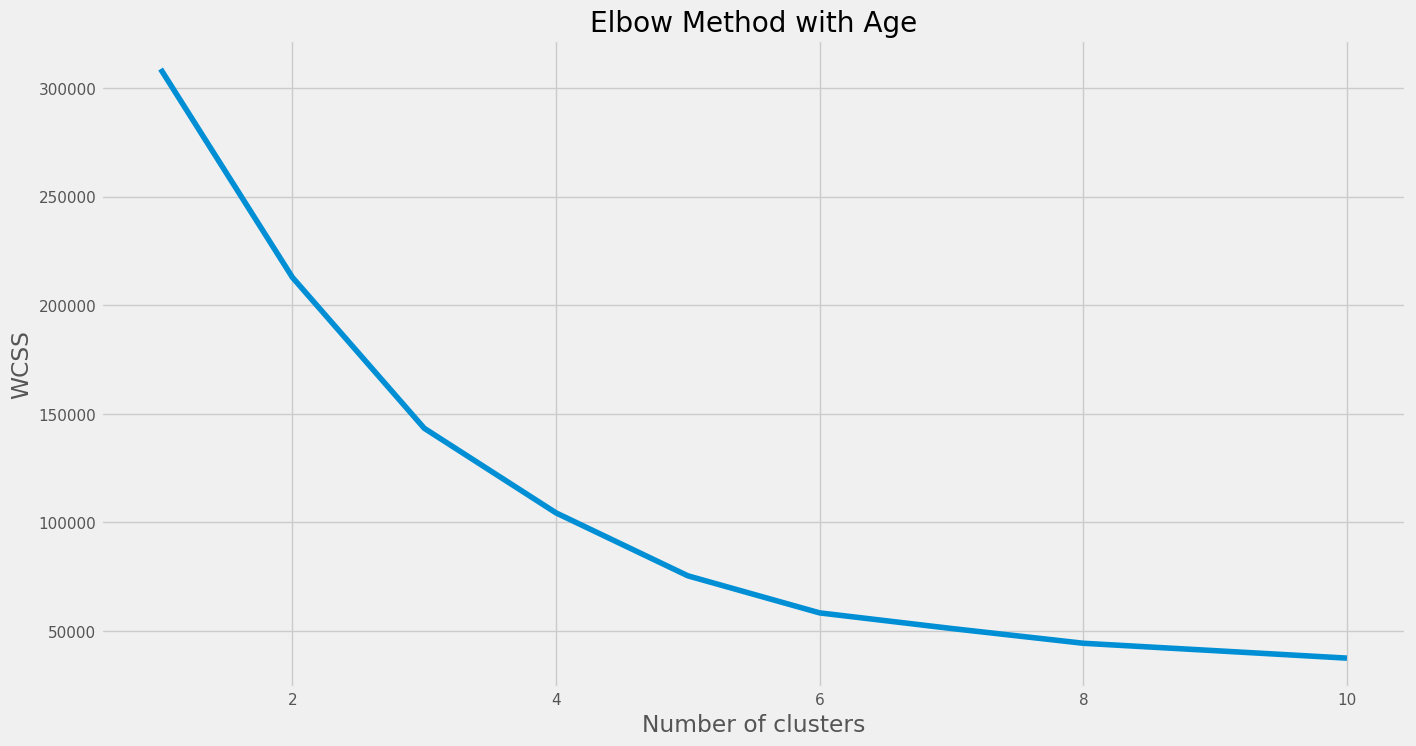

In [28]:
# Tarea: entrenar k-means con elbow method
wcss2 = []
for i in range(1, 11):
    kmeans2 = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=42)
    kmeans2.fit(X2)
    wcss2.append(kmeans2.inertia_)

plt.plot(range(1, 11), wcss2)
plt.title('Elbow Method with Age')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

¿Hmmmm no queda muy claro si K=3, K=5 o K=6, no?

Comprobemos mejor con Silhouette Method

For 2 clusters: average silhouette_score is 0.293166070535953
For 3 clusters: average silhouette_score is 0.3839349967742105
For 4 clusters: average silhouette_score is 0.40546302077733304
For 5 clusters: average silhouette_score is 0.44446409171786105
For 6 clusters: average silhouette_score is 0.4523566166018854
For 7 clusters: average silhouette_score is 0.4398198217929885
For 8 clusters: average silhouette_score is 0.42977587111050725


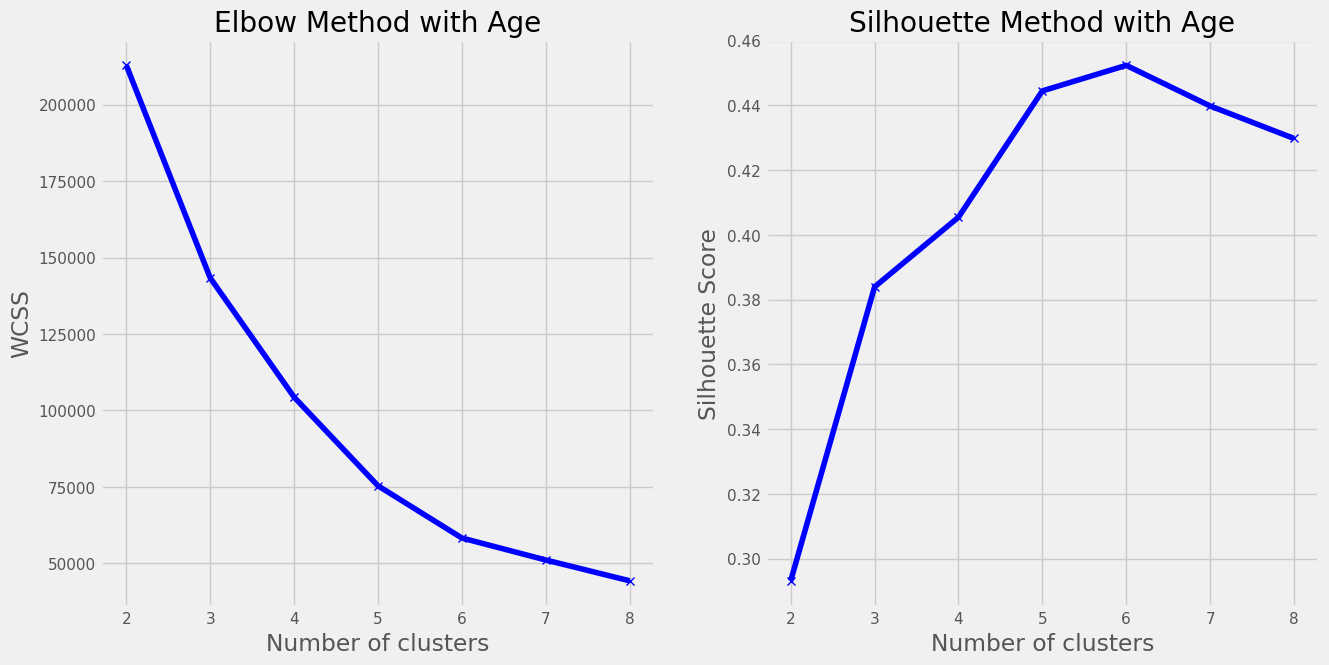

In [29]:
# Tarea: entrenar con elbow + silhouette
range_n_clusters = range(2, 9)
elbow2 = []
ss2 = []
for n_clusters in range_n_clusters:
    clusterer2 = KMeans(n_clusters=n_clusters, init='k-means++', max_iter=300, n_init=10, random_state=42)
    cluster_labels2 = clusterer2.fit_predict(X2)
    silhouette_avg2 = silhouette_score(X2, cluster_labels2)
    ss2.append(silhouette_avg2)
    elbow2.append(clusterer2.inertia_)
    print(f"For {n_clusters} clusters: average silhouette_score is {silhouette_avg2}")

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 7))
ax1.plot(range_n_clusters, elbow2, 'bx-')
ax1.set_title('Elbow Method with Age')
ax1.set_xlabel('Number of clusters')
ax1.set_ylabel('WCSS')

ax2.plot(range_n_clusters, ss2, 'bx-')
ax2.set_title('Silhouette Method with Age')
ax2.set_xlabel('Number of clusters')
ax2.set_ylabel('Silhouette Score')

plt.show()

Al incluir la edad, somos capaces de diferenciar aún más nuestros clusters, sin embargo obteniendo un silhouette score general menor.

In [30]:
#Ahora, utilicemos el método fit_predict() para crear nuestros clusters
kmeans2 = KMeans(n_clusters=5, init='k-means++', max_iter=300, n_init=10, random_state=42)
pred_y2 = kmeans2.fit_predict(X2)

In [31]:
# Añadimos al dataframe la columna de cluster
df2['Cluster'] = pred_y2

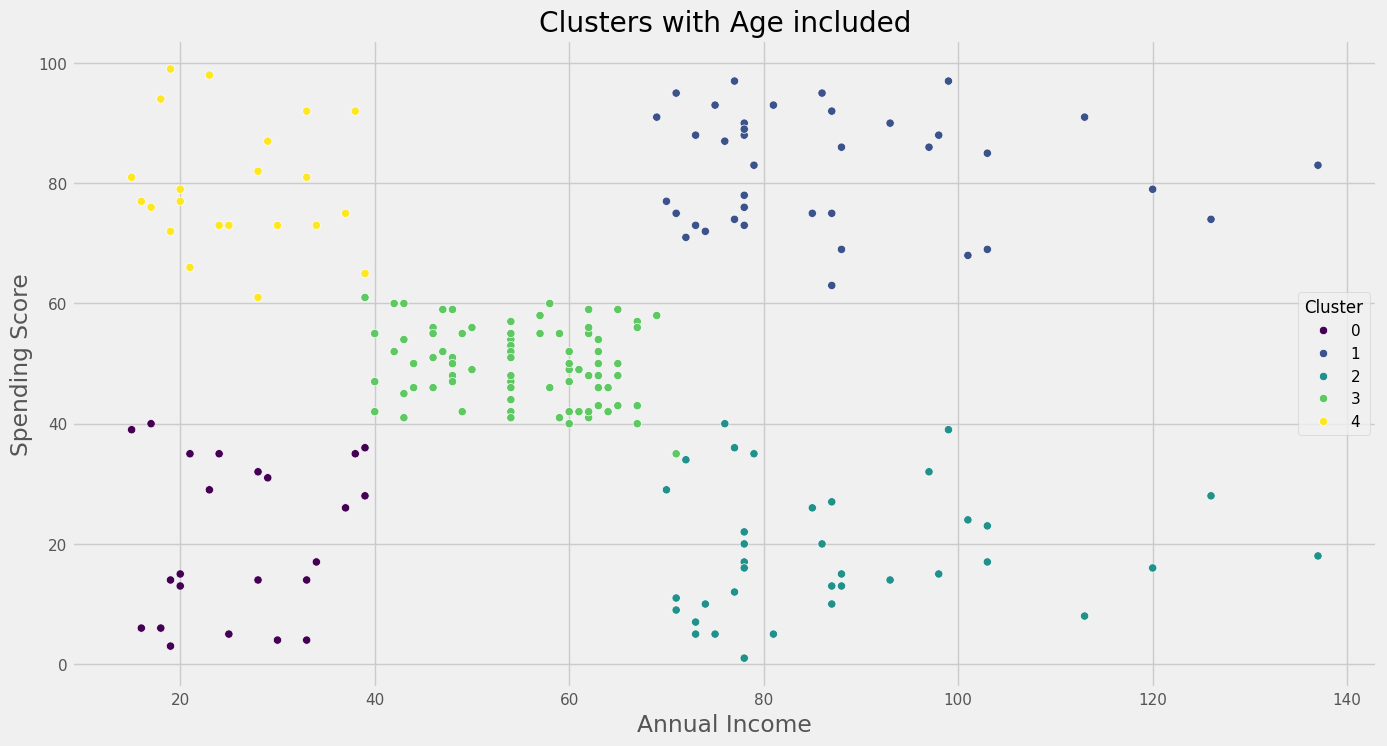

In [33]:
# Ploteamos los nuevos clúster mostrando en el eje X el Annual_income y el eje Y el Spending_socre
sns.scatterplot(data=df2, x='Annual_income', y='Spending_score', hue='Cluster', palette='viridis')
plt.title('Clusters with Age included')
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.legend(title='Cluster')
plt.show()

Da la impresión de que estamos asignando un cluster erróneamente pero veámoslo más en detalle.

Hay que tener en cuenta que esto es una representación bidimensional


### ¿Conclusión?

### Visualizamos los clusters en 3D

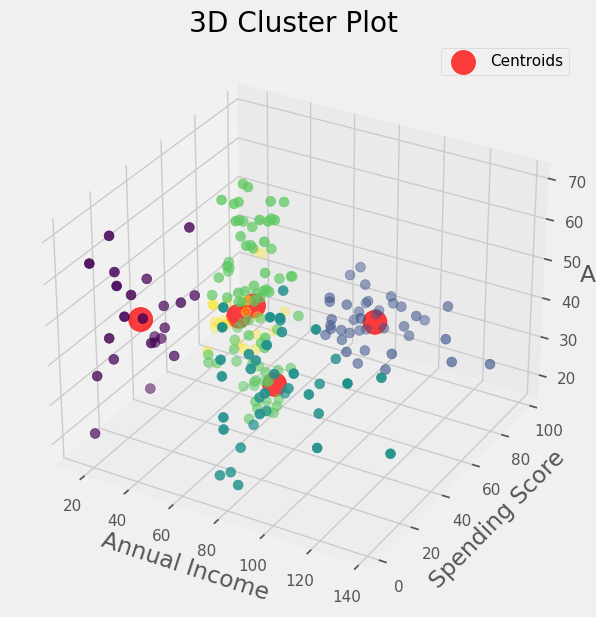

In [34]:
# Ploteamos en 3D?? x annual_income, y spending_score y z age
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

sc = ax.scatter(X2[:, 0], X2[:, 1], X2[:, 2], c=pred_y2, s=50, cmap='viridis')
centers2 = kmeans2.cluster_centers_
ax.scatter(centers2[:, 0], centers2[:, 1], centers2[:, 2], c='red', s=300, alpha=0.75, label='Centroids')

ax.set_xlabel('Annual Income')
ax.set_ylabel('Spending Score')
ax.set_zlabel('Age')
plt.title('3D Cluster Plot')
plt.legend()
plt.show()

In [35]:
# Número de muestras por clúster en orden descendente
print(df2['Cluster'].value_counts())

for i in range(0, 5):
  print('Customer IDs for cluster:', i)
  print(df2[df2['Cluster'] == i]['CustomerID'].values)
  print()

Cluster
3    79
1    39
2    37
0    23
4    22
Name: count, dtype: int64
Customer IDs for cluster: 0
[ 1  3  5  7  9 11 13 15 17 19 21 23 25 27 29 31 33 35 37 39 41 43 45]

Customer IDs for cluster: 1
[124 126 128 130 132 134 136 138 140 142 144 146 148 150 152 154 156 158
 160 162 164 166 168 170 172 174 176 178 180 182 184 186 188 190 192 194
 196 198 200]

Customer IDs for cluster: 2
[125 129 131 133 135 137 139 141 143 145 147 149 151 153 155 157 159 161
 163 165 167 169 171 173 175 177 179 181 183 185 187 189 191 193 195 197
 199]

Customer IDs for cluster: 3
[ 44  47  48  49  50  51  52  53  54  55  56  57  58  59  60  61  62  63
  64  65  66  67  68  69  70  71  72  73  74  75  76  77  78  79  80  81
  82  83  84  85  86  87  88  89  90  91  92  93  94  95  96  97  98  99
 100 101 102 103 104 105 106 107 108 109 110 111 112 113 114 115 116 117
 118 119 120 121 122 123 127]

Customer IDs for cluster: 4
[ 2  4  6  8 10 12 14 16 18 20 22 24 26 28 30 32 34 36 38 40 42 46]



In [36]:
for i in range(0,6):
  print('Customer IDs for cluster:', i)
  print(df2[df2['Cluster'] == i]['CustomerID'].values)
  print()

Customer IDs for cluster: 0
[ 1  3  5  7  9 11 13 15 17 19 21 23 25 27 29 31 33 35 37 39 41 43 45]

Customer IDs for cluster: 1
[124 126 128 130 132 134 136 138 140 142 144 146 148 150 152 154 156 158
 160 162 164 166 168 170 172 174 176 178 180 182 184 186 188 190 192 194
 196 198 200]

Customer IDs for cluster: 2
[125 129 131 133 135 137 139 141 143 145 147 149 151 153 155 157 159 161
 163 165 167 169 171 173 175 177 179 181 183 185 187 189 191 193 195 197
 199]

Customer IDs for cluster: 3
[ 44  47  48  49  50  51  52  53  54  55  56  57  58  59  60  61  62  63
  64  65  66  67  68  69  70  71  72  73  74  75  76  77  78  79  80  81
  82  83  84  85  86  87  88  89  90  91  92  93  94  95  96  97  98  99
 100 101 102 103 104 105 106 107 108 109 110 111 112 113 114 115 116 117
 118 119 120 121 122 123 127]

Customer IDs for cluster: 4
[ 2  4  6  8 10 12 14 16 18 20 22 24 26 28 30 32 34 36 38 40 42 46]

Customer IDs for cluster: 5
[]

